In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Functions as AC

### NOTE: To view any functions that are defined outside the decision tree and random forest classes, go to Functions.py

# Data Preprocessing (6.3)


### Loading the Data

In [2]:
training_set = AC.data_loader("training_set.csv")

$\textbf{Training Set Data Description:}$

$\quad$ ra) Right Ascension

$\quad$ dec) Declination

$\quad$ plx) Parallax

$\quad$ pmra) Right Ascension component of proper motion

$\quad$ pmdec) Declination component of proper motion

$\quad$ g_mag) G apparent magnitude

$\quad$ bp_mag) Blue Photometric apparent magnitude

$\quad$ rp_mag) Red Photometric apparent magnitude

$\quad$ label) Galactic component [0: thin disk, 1: thick disk, 2: Galactic Halo]

$\quad$ g_rp) G - RP color index

$\quad$ bp_g) BP - G color index

$\quad$ bp_rp) BP - RP color index

In [3]:
display(training_set)

,Unnamed: 0,ra,dec,plx,pmra,pmdec,g_mag,bp_mag,rp_mag,label,g_rp,bp_g,bp_rp
0,49345,4.202,-0.017,14.202,162.7,-227.0,19.588,20.082,18.944,1,0.644,0.494,1.138
1,58049,2.816,0.401,18.391,-58.7,-164.6,18.755,19.200,18.068,1,0.687,0.445,1.132
2,54663,2.871,-0.134,12.690,28.4,-164.9,19.595,20.198,18.791,1,0.804,0.603,1.407
3,28301,4.453,-1.170,13.315,-89.6,-47.9,18.846,19.253,18.319,0,0.527,0.407,0.934
4,47571,5.678,-0.315,38.577,-126.8,-712.3,14.751,14.869,14.520,1,0.231,0.118,0.349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,36783,3.773,0.323,14.219,-110.0,61.9,19.617,19.989,18.980,1,0.637,0.372,1.009
29996,53135,3.492,-0.358,13.786,-55.0,-159.5,19.555,20.014,18.801,1,0.754,0.459,1.213
29997,54626,2.605,0.008,15.440,-219.9,-352.8,19.398,19.990,18.737,1,0.661,0.592,1.253
29998,90325,1.854,0.031,11.257,247.7,-329.2,19.267,19.800,18.645,2,0.622,0.533,1.155


### Splitting up the data via galactic component

In [4]:
# Select only data from the training set that is in the thin disk (label=0)
thin_disk = training_set[training_set["label"] == 0]

# Select only data from the training set that is in the thick disk (label=1)
thick_disk = training_set[training_set["label"] == 1]

# Select only data from the training set that is in the halo (label=2)
halo = training_set[training_set["label"] == 2]

print('the amount of white dwarfs in the training set are ' + str(len(training_set)))
print('the amount of white dwarfs in the thin disk are ' + str(len(thin_disk)))
print('the amount of white dwarfs in the thick disk are ' + str(len(thick_disk)))
print('the amount of white dwarfs in the halo are ' + str(len(halo)))

the amount of white dwarfs in the training set are 30000
the amount of white dwarfs in the thin disk are 9933
the amount of white dwarfs in the thick disk are 10112
the amount of white dwarfs in the halo are 9955


### Visualizing Features of the White Dwarfs in the thin disk, thick disk, and galactic halo

$\quad$ Red dashed line) Mean

$\quad$ Green dashed line) Median

#### G Magnitude

mean of thin disk WDs is 17.927564381355076
mean of thick disk WDs is 18.546776404272148
mean of halo WDs is 18.45438473129081
median of thin disk WDs is 18.216
median of thick disk WDs is 18.922
median of halo WDs is 18.886


"\nThin disk white dwarfs have a lower g magnitude than thick disk/halo WD's possibly \n\nsuggesting that they are younger white dwarfs, as young WD's are more luminous compared to older WDs\n"

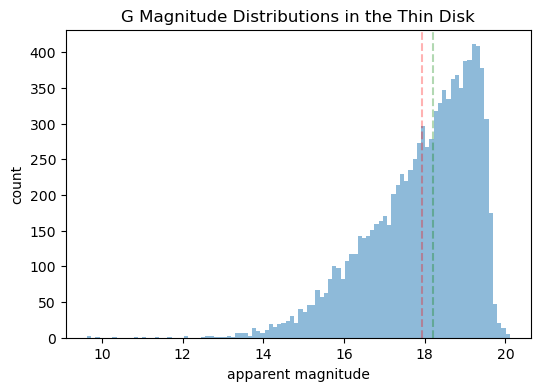

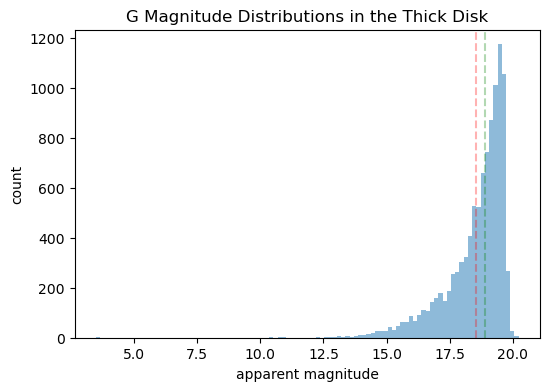

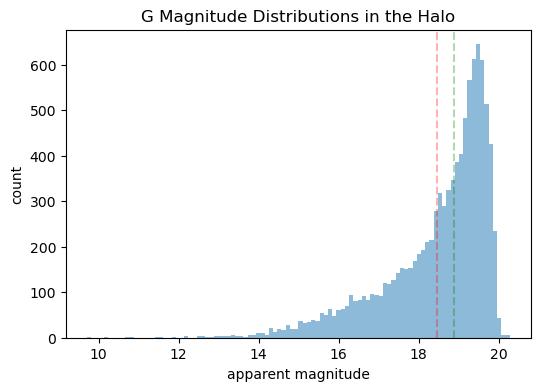

In [5]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(halo['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Halo')


print('mean of thin disk WDs is ' + str(np.mean(thin_disk['g_mag'])))
print('mean of thick disk WDs is ' + str(np.mean(thick_disk['g_mag'])))
print('mean of halo WDs is ' + str(np.mean(halo['g_mag'])))

print('median of thin disk WDs is ' + str(np.median(thin_disk['g_mag'])))
print('median of thick disk WDs is ' + str(np.median(thick_disk['g_mag'])))
print('median of halo WDs is ' + str(np.median(halo['g_mag'])))



'''
Thin disk white dwarfs have a lower g magnitude than thick disk/halo WD's possibly 

suggesting that they are younger white dwarfs, as young WD's are more luminous compared to older WDs
'''

#### BP - RP Color Index

mean of thin disk WDs is 0.5981964159871137
mean of thick disk WDs is 0.9838180379746836
mean of halo WDs is 1.0010447011551986
median of thin disk WDs is 0.6660000000000004
median of thick disk WDs is 1.093
median of halo WDs is 1.157


"\nThin disk white dwarfs have a lower blue - red color index than thick disk WDs which have a lower blue - red than halo WD's also \n\nsuggesting that they are younger white dwarfs, as young WD's would appear bluer than older white dwarfs, and the lower the bp-rp, \n\nthe bluer the star appears\n"

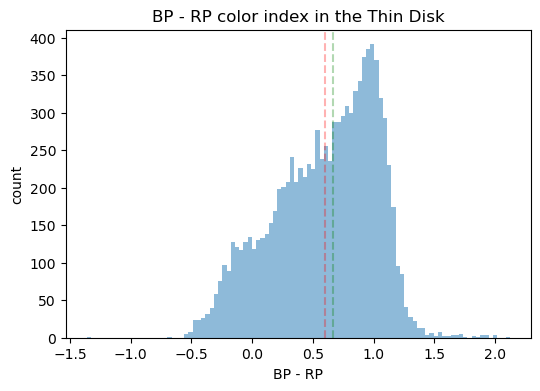

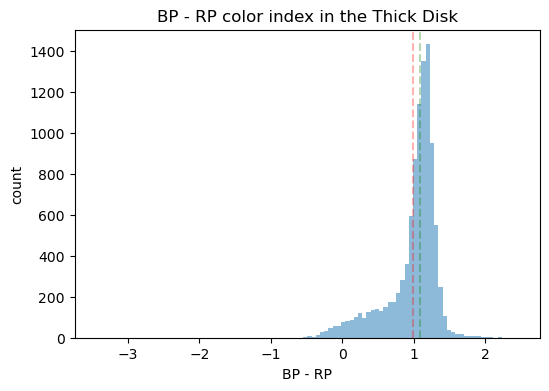

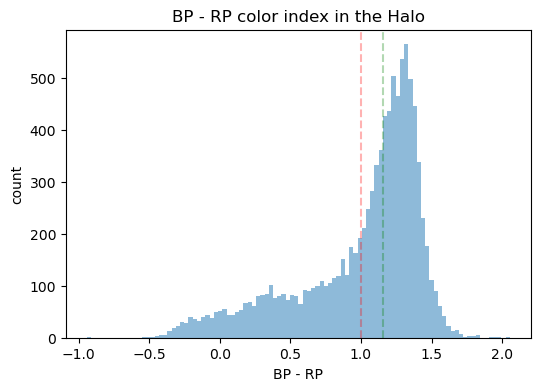

In [6]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(halo['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Halo')

print('mean of thin disk WDs is ' + str(np.mean(thin_disk['bp_rp'])))
print('mean of thick disk WDs is ' + str(np.mean(thick_disk['bp_rp'])))
print('mean of halo WDs is ' + str(np.mean(halo['bp_rp'])))

print('median of thin disk WDs is ' + str(np.median(thin_disk['bp_rp'])))
print('median of thick disk WDs is ' + str(np.median(thick_disk['bp_rp'])))
print('median of halo WDs is ' + str(np.median(halo['bp_rp'])))



'''
Thin disk white dwarfs have a lower blue - red color index than thick disk WDs which have a lower blue - red than halo WD's also 

suggesting that they are younger white dwarfs, as young WD's would appear bluer than older white dwarfs, and the lower the bp-rp, 

the bluer the star appears
'''

#### Parallax

mean of thin disk WDs is 16.181028289539917
mean of thick disk WDs is 17.854868176424052
mean of halo WDs is 18.244324359618282
median of thin disk WDs is 13.476
median of thick disk WDs is 15.0515
median of halo WDs is 15.665


"\nThin disk white dwarfs have a smaller parallax than thick disk WDs which have a smaller parallax than halo WDs\n\nsuggesting that thin disk WDs are on average further away from Earth than thick disk WDs and halo WDs however that doesn't \n\nreally make sense physically as WDs in the thin disk should be closer to Earth than WDs in the thick disk and halo.\n\nCould this be due to improper creation of the training set? or is the parallax number supposed to be the distance converted\n\nfrom the parallax?\n"

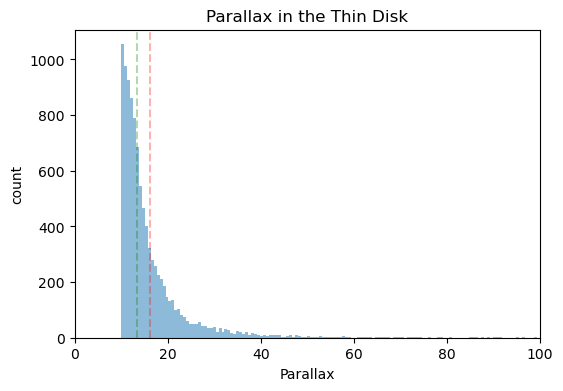

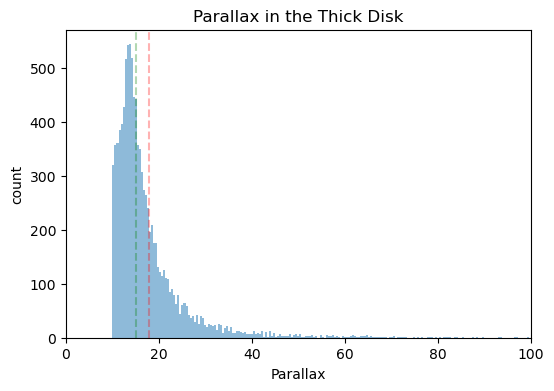

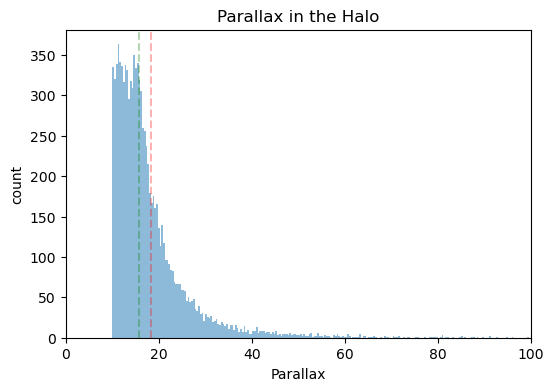

In [7]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(thin_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
plt.xlim(0, 100)
plt.title('Parallax in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(thick_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
plt.xlim(0, 100)
plt.title('Parallax in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(halo['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
plt.xlim(0, 100)
plt.title('Parallax in the Halo')

print('mean of thin disk WDs is ' + str(np.mean(thin_disk['plx'])))
print('mean of thick disk WDs is ' + str(np.mean(thick_disk['plx'])))
print('mean of halo WDs is ' + str(np.mean(halo['plx'])))

print('median of thin disk WDs is ' + str(np.median(thin_disk['plx'])))
print('median of thick disk WDs is ' + str(np.median(thick_disk['plx'])))
print('median of halo WDs is ' + str(np.median(halo['plx'])))



'''
Thin disk white dwarfs have a smaller parallax than thick disk WDs which have a smaller parallax than halo WDs

suggesting that thin disk WDs are on average further away from Earth than thick disk WDs and halo WDs however that doesn't 

really make sense physically as WDs in the thin disk should be closer to Earth than WDs in the thick disk and halo.

Could this be due to improper creation of the training set? or is the parallax number supposed to be the distance converted

from the parallax?
'''

### Proper Motion RA vs Dec for thin disk, thick disk, and galactic halo

#### Thin and thick disk white dwarfs have a more even spread around the origin (low proper motion)
$\quad$ -Thin disk ~ 500

$\quad$ -Thick disk ~ 1000

$\quad$ -Halo ~ 2000 - 5000
#### Galactic halo white dwarfs have broader spread

Text(0.5, 1.0, 'Proper motion RA vs Dec in the galactic halo')

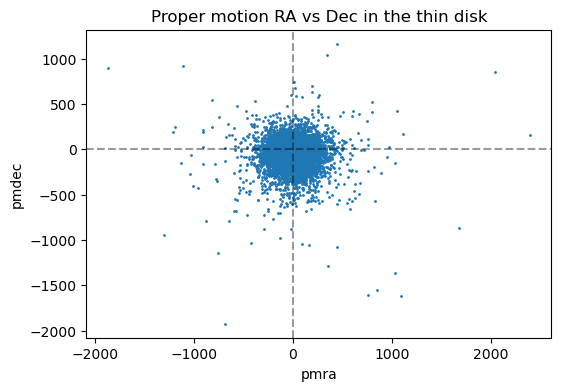

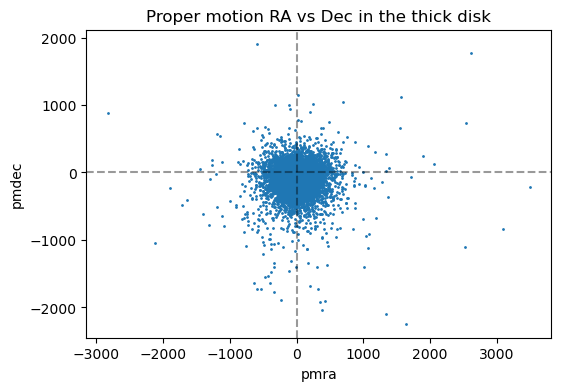

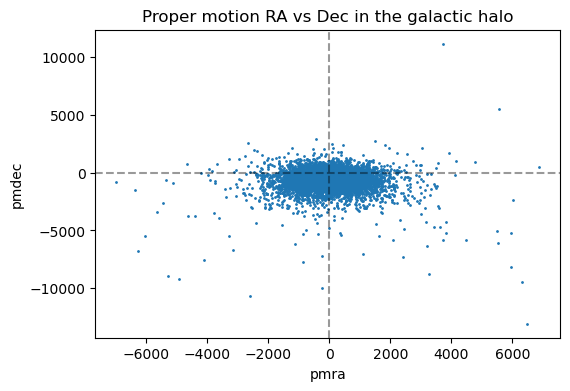

In [8]:
plt.subplots(figsize=(6, 4))
plt.scatter(thin_disk['pmra'], thin_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thin disk')

plt.subplots(figsize=(6, 4))
plt.scatter(thick_disk['pmra'], thick_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thick disk')

plt.subplots(figsize=(6, 4))
plt.scatter(halo['pmra'], halo['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the galactic halo')

From the proper motion, we learn a lot about the behavior of white dwarfs in their galactic location:

**Thin Disk:** White dwarfs are on average clustered near the origin implying they share similar orbital motions with one another around the galactic center. This shows that they form from a rotating disk of gas with relatively low velocity dispersion, thus low deviation from the origin.

**Thick Disk:** White dwarfs are on average a bit more spread out from the origin than the thin disk but still concentrated near the origin. The increased scatter is due to the higher velocity dispersion. 

**Galactic Halo:** White dwarfs have a much greater spread in their proper motion showing that halo stars have higher velocity dispersions and more randomly oriented orbits. 


### In order to take out any bias due to the ordering of the data, shuffle the training set

In [9]:
# Shuffle Rows in the Dataset to get rid of any bias that could've been present due to ordering
randomized_training_set = training_set.iloc[np.random.permutation(len(training_set))].reset_index(drop=True)


### Sort the data set into features, and target array (location of white dwarfs)

In [10]:
# Create an dataframe of the features of the White Dwarfs
features = randomized_training_set.drop(['label'], axis=1)

# Create an array of the galactic locations of the White Dwarfs
target_array = randomized_training_set['label']


### Normalize the features by using Min - Max Scaling

$\quad$ -range of values for all features now between -1 and 1

$\quad$ -ensures consistency among featues

### Benefits of Normalization

$\quad$ -Not required for random forest 

$\quad$ -Can speed up computation times when picking thresholds to split on

$\quad$ -Normalization allows for an easier comparison of feature importance as -1 to 1 is an easy number range for us to visualize

$\quad$ -Doesn't lose any information about the shape of the distribution


### Min-Max Scaling (between [-1, 1]):

### $\qquad x_{scaled} = 2 * \frac{x - x_{min}}{x_{max}-x_{min}} - 1$

Scaled Dataset Using Pandas


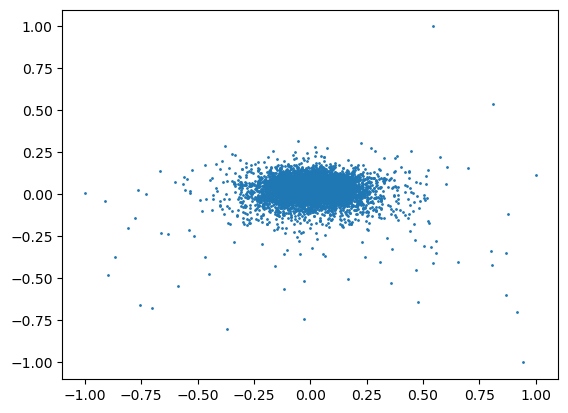

In [11]:
# Normalization using min-max scaling
features_norm = AC.min_maxing(features, range=-1)


print("Scaled Dataset Using Pandas")
features_norm.head()


plt.scatter(features_norm['pmra'], features_norm['pmdec'], s=1)

### Splitting Features Dataframe and Target Array into train and validation dataframes and arrays


#### 75% chosen for split

This number is chosen for a couple reasons:

1) The more training data we have the better our decision trees known patterns that exist in our dataset

2) A substantial amount of validation data is still important as this lets us verify our decision trees

3) Another point to note is that the decision tree is computationally expensive so having 75% of training data vs 90% reduces the time taken to fit our decision trees

In [12]:
# Select ratio
ratio = 0.75

total_rows_features_norm = features_norm.shape[0]
total_rows_features = features.shape[0]
train_size = int(total_rows_features*ratio)
train_size_norm = int(total_rows_features_norm*ratio)

# Split Feature data into train and validate
features_train_norm = features_norm[0:train_size_norm]
features_train = features[0:train_size]
features_validate_norm = features_norm[train_size_norm:]
features_validate = features[train_size:]


total_rows_target = target_array.shape[0]
target_size = int(total_rows_target*ratio)

# Split Target data into train and validate
target_train = target_array[0:train_size]
target_validate = target_array[train_size:]

In [13]:
# print feature train set
print("Features Train dataframe")
print(len(features_train))

# print feature validate set
print("Features Validation dataframe")
print(len(features_validate))

# print target train set
print("Target Train dataframe")
print(len(target_train))

# print target validate set
print("Target Validation dataframe")
print(len(target_validate))

Features Train dataframe
22500
Features Validation dataframe
7500
Target Train dataframe
22500
Target Validation dataframe
7500


In [14]:
print(target_train)
print(features_train)

0        2
1        2
2        1
3        1
4        0
        ..
22495    1
22496    1
22497    0
22498    2
22499    1
Name: label, Length: 22500, dtype: int64
       Unnamed: 0     ra    dec     plx   pmra  pmdec   g_mag  bp_mag  rp_mag  \
0           84917  4.793  0.303  15.424 -500.0 -482.0  15.054  15.009  15.150   
1          107388  6.005  0.877  18.125  103.4  227.9  17.960  18.318  17.444   
2           40042  4.960  0.243  11.577   32.9  -77.4  16.982  17.068  16.822   
3           64438  5.622  0.076  14.762  194.5  -76.0  19.089  19.563  18.470   
4           21357  4.361  0.738  16.326  -56.5  -52.0  18.797  19.206  18.373   
...           ...    ...    ...     ...    ...    ...     ...     ...     ...   
22495       52789  2.946  0.868  11.840  -58.6 -103.3  19.198  19.604  18.578   
22496       70095  2.516  1.103  13.146 -123.4 -244.5  19.629  20.065  18.998   
22497       24298  3.969  0.507  22.119  -79.2 -246.4  17.039  17.239  16.696   
22498       99629  2.679 -0.

In [15]:
# There exists 11 features

# Decision Tree Classifier (6.4)


### Creating the Decision Tree Class (6.4.1)

In [16]:
class DecisionTreeModel:
   
    '''
     encapsulate all the methods and properties of my decision tree algorithm
    '''
    def __init__(self, max_depth, max_features, tree=None, dataset=None, labels=None, depth=0):
        
        '''
        DESCRIPTION: Initializes the decision tree class
        
        self: The instance on which a method is called
        
        max_depth: controls the maximum depth of the tree
        
        max_features:  
        - determines the number of features to consider at each split within the tree. 
        - If max features is set to None, the model will consider all features, as in a standard decision tree
        
        dataset: The dataset
        
        labels: The class labels for each sample in dataset
        
        tree: stores the root of the decision tree structure once it is built, initially set to None
        ''' 
        
        self.max_depth = max_depth
        self.max_features = max_features
        self.tree = tree
        self.dataset = dataset
        self.labels = labels
        self.depth = depth
        
    
    def gini(self, labels):
        
        '''
        DESCRIPTION: calculate the Gini impurity of a set of labels y using the formula:
        
        1 - \Sum_{i=1}^k p_i^2
        
        where p_i is the probability of a randomly chosen element being classified as class i
        
        scores range from 0 (pure node) to 0.5 (maximum impurity in binary classification)
        
        INPUTS: labels
        
        OUTPUT: The method returns a single float representing the impurity
        '''
        # Deals with divide by zero error
        if len(labels) == 0:
            return 1
        
        # Splits the labels into their respective parts and divides by the total amount to get the probability
        counts = np.bincount(labels.astype(int))
        p = counts / float(len(labels))
            
        # sums up the square of the probabilities
        p_sum = np.sum(p**2)

        # calculates the gini impurity
        gini = 1 - p_sum
        return gini
        
        
    
    def split(self, X, y, feature_index, threshold):
    
        '''
        DESCRIPTION: divides the dataset into two subsets based on a given feature and threshold
        
        INPUTS: 
            X: Dataset to split
            y: The class labels for each sample in X
            feature_index: The index of the feature to split on
            threshold: The threshold value for the split
            
        OUTPUTS: 
             X left and X right: Data subsets containing the left and right splits of X
             y left and y right: Class labels corresponding to the left and right subsets
        '''
    
        left_mask = X[:, feature_index] <= threshold
        return (X[left_mask], X[~left_mask],  y[left_mask], y[~left_mask])
        
    
    def best_split(self):
        
        '''
        DESCRIPTION: Given a dataset X and its labels y, this method evaluates all possible feature and threshold combinations to find the split that minimizes the Gini impurity
        
        INPUTS: 
            X: The dataset to evaluate for the best split.
            y: The class labels for each sample in X
            
        OUTPUTS: The method returns a dictionary representing the best split found
            feature index: The index of the feature used for the best split.
            threshold: The threshold value for the best split.
            X left and X right: Data subsets containing the left and right splits of X.
            y left and y right: Class labels for the left and right subsets of y
        '''
        n_features = self.dataset.shape[1]
        
        # Creates an array of feature indexes
        if self.max_features is None or self.max_features > n_features:
            feature_indexed = np.arange(n_features) #all features
        else:
            feature_indexed = np.random.choice(n_features, size=self.max_features, replace=False)
    
        best_gini = 1.0       
        best_split = None 
        n_samples = len(self.labels)
        
        X = self.dataset
        y = self.labels
    
        # Loops through each feature index
        for jj in range(len(feature_indexed)):
            
            # Sets our feature index to be our array of features, then pulls out a column for that feature
            feature_index = int(feature_indexed[jj])
            feature = X[:, feature_index]
                
            # Selects only unique values in our feature array to be used as candidate thresholds
            unique_features = np.unique(feature)
            
            if len(unique_features) <= 1:
                continue
            
            if len(unique_features) > 100:
                candidate_thresholds = np.percentile(unique_features, np.linspace(0,100,100))
                
            else:
                candidate_thresholds = unique_features
            
            # Loops through each candidate threshold
            for ii in range(len(candidate_thresholds)):
                # Sets our threshold as the array of candidate thresholds
                threshold = candidate_thresholds[ii]
                
                # Splits our data set for candidate_threshold[ii]
                x_left, x_right, y_left, y_right = self.split(X, y, feature_indexed[jj],threshold)
                
                # Calculates the Gini impurity for the left and right data
                Gini_left = self.gini(y_left)
                Gini_right = self.gini(y_right)
                
                # Calculates the weighted impurity for the decision
                I_split = (len(y_left) / n_samples) * Gini_left + (len(y_right) / n_samples) * Gini_right
                
                if I_split < best_gini:         
                    best_gini = I_split          
                    best_split = {
                        'feature_index': feature_indexed[jj],
                        'threshold': threshold,
                        'x_left': x_left,
                        'x_right': x_right,
                        'y_left': y_left,
                        'y_right': y_right,
                        'I_split': I_split
                    }
            
        return best_split
    
    def build_tree(self, X=None, y=None, depth=0):
        
        '''
        DESCRIPTION: constructs the entire decision tree by finding the best split at each node using the best_split() and split_methods(), while evaluating the node purity with gini()
        
        INPUTS: 
            X: The current subset of the dataset.
            y: The class labels for the current subset.
            depth: The current depth level in the tree (initialize this as 0)
    
        OUTPUTS: returns a dictionary representing the node with the following attributes
            feature index and threshold if its a decision node.
            gini (the impurity score) and samples (the count of samples).
            left and right, which are the left and right child nodes if its a decision node.
            value if its a leaf node (the predicted class label).
        '''
        if X is None and y is None:
            X = self.dataset
            y = self.labels

        X = np.asarray(X)
        y = np.asarray(y).astype(int)

        self.dataset = X
        self.labels = y

        n_samples=len(y)
        minimum_samples = n_samples*0.01 # min samples chosen to be 1% of amount of data

        unique_labels = np.unique(y)
        n_classes = len(unique_labels)
        

        # First leaf node condition: If the depth is at or exceeds the max depth, return parameters of the leaf node
        if depth >= self.max_depth:
            most_common_class = int(np.bincount(y).argmax())
            
            return {
                'type': "leaf",
                'value': most_common_class,
                'gini': self.gini(y),
                'samples': n_samples,
                'stopping_condition': "max depth achieved"
            }

        # Second leaf node condition: If the the number of samples is equal to or smaller than the minimum amount of samples, return parameters of the leaf node
        if n_samples <= minimum_samples:
            most_common_class = int(np.bincount(y).argmax())

            return {
                'type': "leaf",
                'value': most_common_class,
                'gini': self.gini(y),
                'samples': n_samples,
                'stopping_condition': "minimum samples reached"
            }

        # Third leaf node condition: If all labels are the same label, return parameters of the leaf noe
        if n_classes == 1:
            return {
                'type': "leaf",
                'value': int(y[0]),
                'gini': 0.0,
                'samples': n_samples,
                'stopping_condition': "all remaining labels are the same"
            }

        # Condition for when we're at a decision node
        else:
            # splits data using best split method
            best_split = self.best_split()

            # Runs build tree method recursiely using the left part, updating the depth by 1
            left_child = self.build_tree(best_split['x_left'], best_split['y_left'], depth + 1)
            # Runs build tree method recursiely using the left part, updating the depth by 1
            right_child = self.build_tree(best_split['x_right'], best_split['y_right'], depth + 1)

            return {
                'type': "decision",
                'feature_index': best_split['feature_index'],
                'threshold': best_split['threshold'],
                'samples': len(best_split['y_left']) + len(best_split['y_right']),
                'left': left_child,
                'right': right_child,
                'I_split': best_split['I_split']
            }
            
    
    def fit(self, X=None, y=None):
        
        '''
        DESCRIPTION: initiates the tree-building process by calling build tree on the input data
        
        INPUTS:
            X: The dataset used to train the tree.
            y: The class labels for each sample in X
        
        OUTPUTS: The method does not return anything, but it updates the tree attribute with the structure of the trained decision tree
        '''
        if X is None and y is None:
            X = self.dataset
            y = self.labels

        X = np.asarray(X)
        y = np.asarray(y).astype(int)

        self.dataset = X
        self.labels = y

        self.tree = self.build_tree(self.dataset, self.labels, depth=0)

        return self
    
   
    def predict_sample(self, X, indices, predictions, node):
 
        '''
        DESCRIPTION: predict the class for a single sample through the trained decision tree
        
        INPUTS:
            sample: A single data sample for which we want to predict the class label.
            node: The current node in the decision tree (start with the root node)
        
        OUTPUTS: returns the predicted class label for the input sample
        '''
        
        if len(indices) == 0:
            return
        
        if node['type'] == 'leaf':
            predictions[indices] = node['value']
            return
        
        feature_vals = X[indices, node['feature_index']]
        left_mask = feature_vals <= node['threshold']
        
        left_indices = indices[left_mask]
        right_indices = indices[~left_mask]
        
    
        if len(left_indices) > 0:
            self.predict_sample(X, left_indices, predictions, node['left'])
        if len(right_indices) > 0:
            self.predict_sample(X, right_indices, predictions, node['right'])

            
        
    def predict(self, X):
        
        '''
        DESCRIPTION: predict class labels for all samples in X by calling predict sample for each sample
        
        INPUTS:
            X: The dataset for which to predict class labels
        
        OUTPUTS: Return a list of predicted class labels, one for each sample in X
        '''
        if X is None:
            X = self.dataset
            
        X = np.asarray(X)
        n_samples = len(X)
        predictions = np.zeros(n_samples, dtype=int)

        indices = np.arange(n_samples)
        self.predict_sample(X, indices, predictions, self.tree)
        
        return predictions.tolist()
    
    

<>:39: SyntaxWarning: invalid escape sequence '\S'
<>:39: SyntaxWarning: invalid escape sequence '\S'
C:\Users\casey\AppData\Local\Temp\ipykernel_47844\2207722332.py:39: SyntaxWarning: invalid escape sequence '\S'
  1 - \Sum_{i=1}^k p_i^2


In [17]:
X_np = features.to_numpy()
y_np = target_array.to_numpy().astype(int)


X_train_np = features_train.to_numpy()
y_train_np = target_train.to_numpy().astype(int) 


X_vald_np = features_validate.to_numpy()
y_vald_np = target_validate.to_numpy().astype(int)


X_np_norm = features_norm.to_numpy()
X_train_np_norm = features_train_norm.to_numpy()
X_vald_np_norm = features_validate_norm.to_numpy()

In [18]:
print(X_np[0, 1])

print(features[:1])

print(y_np)

4.793
   Unnamed: 0     ra    dec     plx   pmra  pmdec   g_mag  bp_mag  rp_mag  \
0       84917  4.793  0.303  15.424 -500.0 -482.0  15.054  15.009   15.15   

    g_rp   bp_g  bp_rp  
0 -0.096 -0.045 -0.141  
[2 2 1 ... 0 0 0]


### Display info about the Decision Tree Class using help(Class)

In [19]:
print(help(DecisionTreeModel))

Help on class DecisionTreeModel in module __main__:

class DecisionTreeModel(builtins.object)
 |  DecisionTreeModel(
 |      max_depth,
 |      max_features,
 |      tree=None,
 |      dataset=None,
 |      labels=None,
 |      depth=0
 |  )
 |
 |  encapsulate all the methods and properties of my decision tree algorithm
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      max_depth,
 |      max_features,
 |      tree=None,
 |      dataset=None,
 |      labels=None,
 |      depth=0
 |  )
 |      DESCRIPTION: Initializes the decision tree class
 |
 |      self: The instance on which a method is called
 |
 |      max_depth: controls the maximum depth of the tree
 |
 |      max_features:
 |      - determines the number of features to consider at each split within the tree.
 |      - If max features is set to None, the model will consider all features, as in a standard decision tree
 |
 |      dataset: The dataset
 |
 |      labels: The class labels for each sample in dataset

### Using the Decision Tree Class (COMMENTED OUT TO SAVE COMPUTE TIME ON ACTUAL TASKS: ONLY HERE TO SHOW HOW TO USE THE CLASS)


### Create an instance of the tree

In [20]:
# test = DecisionTreeModel(max_depth=5, max_features=11, feature_index=0, threshold=0, tree=None, dataset=features_train, labels=target_train)

### Calculate the gini impurity

### Split the data (sanity check: length of left and right combined should equal length of data)

In [21]:
# gini_score = test.gini(target_train)
# print(gini_score)

# split_x_l, split_x_r, split_y_l, split_y_r = test.split()
# print(len(split_x_l))
# print(len(split_x_r))
# print(len(split_y_l))
# print(len(split_y_r))





### Run best split on the data (warning takes some time to run)


#### Print out characteristics of the best split

In [22]:
# best_split_test = test.best_split() 

In [23]:
# print('The feature index used: ' + str(best_split_test['feature_index']))
# print('The threshold selected for the split: ' + str(best_split_test['threshold']))
# print('Length of X left: ' + str(len(best_split_test['x_left'])))
# print('Length of X right: ' + str(len(best_split_test['x_right'])))
# print('Length of y left: ' + str(len(best_split_test['y_left']))) 
# print('Length of y right: ' + str(len(best_split_test['y_right'])))
# print('Best Gini impurity found: ' + str(best_split_test['I_split']))

### Build Tree from the instance (warning takes a lot of time to run)


#### Print out characteristics of the best split

In [24]:
# build_tree_test = test.build_tree()

In [25]:
# decision = build_tree_test['type']
# print(str(decision) + ' node')
# if decision == "decision":
#     print('The feature index used for this node: ' + str(build_tree_test['feature_index']))
#     print('The threshold selected for this node: ' + str(build_tree_test['threshold']))
#     print('Amount of samples in this node: ' + str(build_tree_test['samples'])) 
#     print('Information about node type and characteristics for the left data: ' + str(build_tree_test['left'])) 
#     print('Information about node type and characteristics for the right data: ' + str(build_tree_test['right'])) 
#     print('Best Gini impurity found for this node: ' + str(build_tree_test['I_split']))
# else:
#     print('Predicted class value: ' + str(build_tree_test['value']))
#     print('Gini score at leaf node: ' + str(build_tree_test['gini']))
#     print('Amount of samples in this node: ' + str(build_tree_test['samples']))
#     print('Stopping condition of the leaf node: ' + str(build_tree_test['stopping_condition']))

### Initialize the tree building process

In [26]:
# fitted_test = test.fit(features_train, target_train)

### Predict the class value based on one sample of features

In [27]:
# test_sample = features_train.iloc[0]
# single_prediction_test = fitted_test.predict_sample(test_sample)
# print(single_prediction_test)

### Predict the class of all features in the training data

In [28]:
# predicted = fitted_test.predict()
# print(predicted)

# Model Training and Validation (6.4.2)


### Initialize a decision with select parameters: Two trees done, one using regular data, the second done using normalized data

In [ ]:
import random
decision_1 = DecisionTreeModel(max_depth=3, max_features=11, tree=None, dataset=None, labels=None)
decision_2 = DecisionTreeModel(max_depth=3, max_features=11, tree=None, dataset=None, labels=None)

### Initialize the fit on the training data and using predict() to predict the classes of the data samples in the validation data

In [43]:
fit_1 = decision_1.fit(X_train_np, y_train_np)
fit_2 = decision_2.fit(X_train_np_norm, y_train_np)

In [47]:
predicted1 = fit_1.predict(X_vald_np)
print(predicted1)

[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 

In [48]:
predicted2 = fit_2.predict(X_vald_np_norm)
print(predicted2)

[1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 1, 

### Create a function (See Functions.py) that calculates the accuracy of the preciction

#### Shows us how accurate our predictions were

In [49]:
A1 = AC.Accuracy(y_vald_np, predicted1)
print('Our predictions were ' + str(A1*100) + '% accruate')

A2 = AC.Accuracy(y_vald_np, predicted2)
print('Our predictions were ' + str(A2*100) + '% accruate for the normalized data')

Our predictions were 84.97333333333333% accruate
Our predictions were 76.41333333333333% accruate for the normalized data


### Create a function (See Functions.py) that calculates the confusion matrix of our predictions

#### Tells us how well our classification model is working by comparing predictions to the actual values for all combinations (i.e. predicted 1, but actual was 0)

In [50]:
CM1 = AC.Confusion(y_vald_np, predicted1)
print('Confusion matrix:')
print(str(CM1[0]))
print(str(CM1[1]))
print(str(CM1[2]))

CM2 = AC.Confusion(y_vald_np, predicted2)
print('Confusion matrix with normalized data:')
print(str(CM2[0]))
print(str(CM2[1]))
print(str(CM2[2]))

Confusion matrix:
[2032, 433, 0]
[0, 2475, 38]
[0, 656, 1866]
Confusion matrix with normalized data:
[1775, 659, 31]
[0, 1715, 798]
[0, 281, 2241]


### Create a function (See Functions.py) that calculates the F1 score of our predictions

#### Combines precision and recall into one statistic. A better metric for how well our model is performing

In [51]:
F1_score_0_1 = AC.F1(CM1, 0)
F1_score_1_1 = AC.F1(CM1, 1)
F1_score_2_1 = AC.F1(CM1, 2)

F1_score_0_2 = AC.F1(CM2, 0)
F1_score_1_2 = AC.F1(CM2, 1)
F1_score_2_2 = AC.F1(CM2, 2)

In [52]:
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0_1))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1_1))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2_1))

print('\n')

print('Our F1 score for thin disk WDs with normalized data is: ' + str(F1_score_0_2))
print('Our F1 score for thick disk WDs with normalized data is: ' + str(F1_score_1_2))
print('Our F1 score for galactic halo WDs with normalized data is: ' + str(F1_score_2_2))

Our F1 score for thin disk WDs is: 0.9037135868356683
Our F1 score for thick disk WDs is: 0.8145466513082112
Our F1 score for galactic halo WDs is: 0.843199276999548


Our F1 score for thin disk WDs with normalized data is: 0.8372641509433962
Our F1 score for thick disk WDs with normalized data is: 0.6636996904024768
Our F1 score for galactic halo WDs with normalized data is: 0.8015021459227468


### Discussing how adjusting parameters in our Decision Tree affects the outcomes

$\quad$ -By increasing both the max depth and max features, more nodes are created giving the user more accurate results

$\quad$ -Increasing max depth and features too much can both increase the run time and overfit the data

$\quad$ -Finding a balance between max depth and max features is important for accurate training

$\quad$ -Similarly, having minimum samples too large can lead to inaccurate leaf nodes, whereas having minimum samples 

$\quad\,$  really small leads to overfitting

# Applying trained model to test data (6.4.3)

### Loading in test data (remove gaia_id so it works with our class)

In [53]:
test_data =  pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_and_Data_Analysis\\Databases\\test.csv").drop(['gaia_id'], axis=1)
# print(test_data)

test_data_new = test_data.drop(['Unnamed: 0'], axis=1)
print(test_data['pop_model_base'].value_counts())


pop_model_base
0    12227
1     1410
2       95
Name: count, dtype: int64


### Precict results of our test data using our trained decision tree

In [54]:
X_test_np = test_data_new.to_numpy()
print(X_test_np[0])

X_test_np_norm = AC.min_maxing(test_data_new, range=-1).to_numpy()

[ 1.14832441e+02  2.01415370e+01  1.55294973e+01 -2.17218356e+01
  8.74196370e+00  1.59708470e+01  1.59185505e+01  1.60035130e+01
  0.00000000e+00 -3.26660000e-02 -5.22965000e-02 -8.49625000e-02]


In [55]:
predict_test_data1 = fit_1.predict(X_test_np)
print(predict_test_data1)

predict_test_data2 = fit_2.predict(X_test_np_norm)
print(predict_test_data2)


[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

### Add these predicted labels to our dataframe for ease of analysis

In [56]:
test_data_new['pred_labels'] = predict_test_data1
print(test_data_new)

               ra        dec        plx         pmra        pmdec      g_mag  \
0      114.832441  20.141537  15.529497   -21.721836     8.741964  15.970847   
1      241.033495 -22.233835  13.047731    21.426339     4.049864  17.585098   
2       51.096542 -19.416015  24.456277   -38.719914   -14.520563  16.840258   
3       96.968286 -46.016491  12.049674   -16.513120     9.110425  18.157219   
4      233.277945  57.542294  16.512933    27.995747   -24.600976  18.965628   
...           ...        ...        ...          ...          ...        ...   
13727  125.580571 -12.823334  16.199233   865.007074  -881.398871  19.503572   
13728  170.973150  57.708166  10.468369   -30.094283  -491.289273  19.648914   
13729  310.649029 -52.305570  11.781754   399.802019  -828.768600  19.341719   
13730   27.037668 -17.208765  12.954320  -105.966890 -1105.825359  17.558308   
13731  161.489061  59.074624  17.482111 -1019.194654 -1462.529939  17.677628   

          bp_mag     rp_mag  pop_model_

### In a similar manner to 6.2, split the data into thin disk, thick disk, and galactic halo using our predicted labels

In [57]:
# Select only data from the training set that is in the thin disk (label=0)
thin_disk = test_data_new[test_data_new["pred_labels"] == 0]

# Select only data from the training set that is in the thick disk (label=1)
thick_disk = test_data_new[test_data_new["pred_labels"] == 1]

# Select only data from the training set that is in the halo (label=2)
halo = test_data_new[test_data_new["pred_labels"] == 2]

print('the amount of white dwarfs in the training set are ' + str(len(test_data_new)))
print('the amount of white dwarfs in the thin disk are ' + str(len(thin_disk)))
print('the amount of white dwarfs in the thick disk are ' + str(len(thick_disk)))
print('the amount of white dwarfs in the halo are ' + str(len(halo)))

the amount of white dwarfs in the training set are 13732
the amount of white dwarfs in the thin disk are 10079
the amount of white dwarfs in the thick disk are 3653
the amount of white dwarfs in the halo are 0


### Display plots for the thin disk, thick disk, and galactic halo to make comments on what we see

Text(0.5, 1.0, 'G Magnitude Distributions in the Halo')

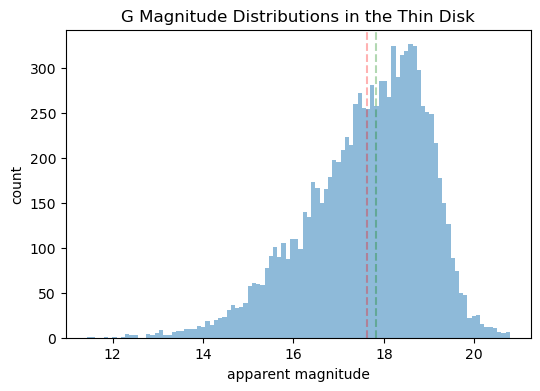

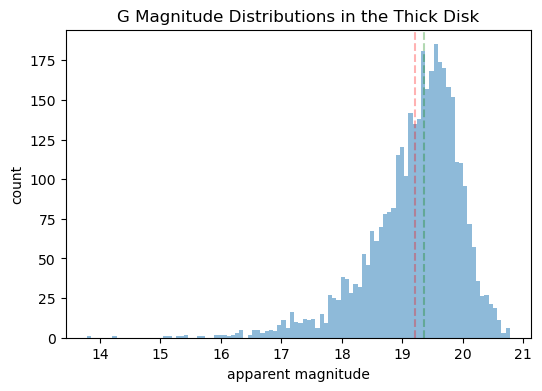

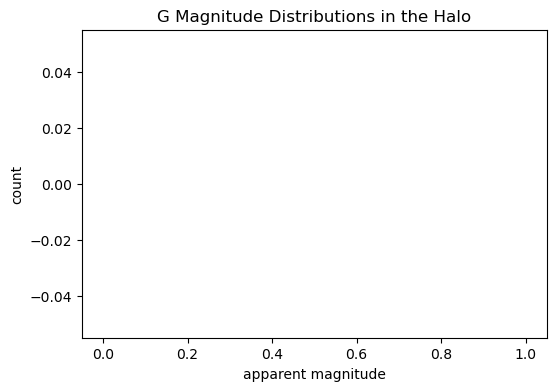

In [60]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['g_mag'], bins=50, alpha=.5)
plt.axvline(np.mean(halo['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Halo')

Text(0.5, 1.0, 'BP - RP color index in the Halo')

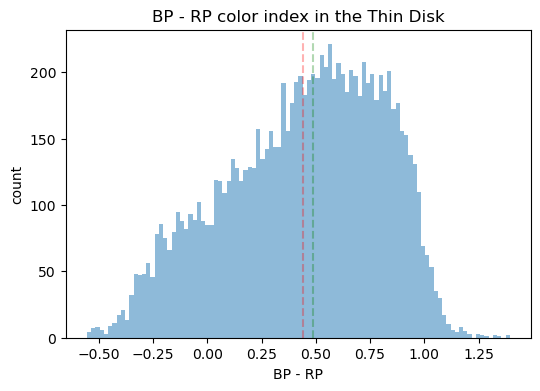

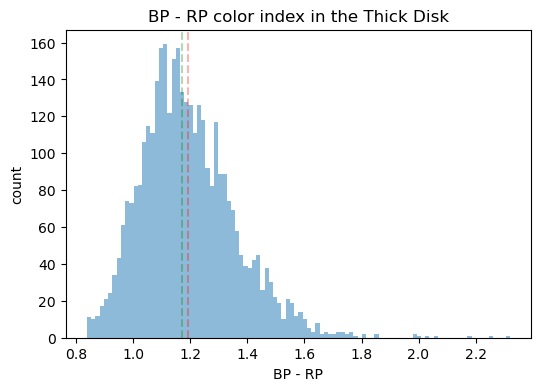

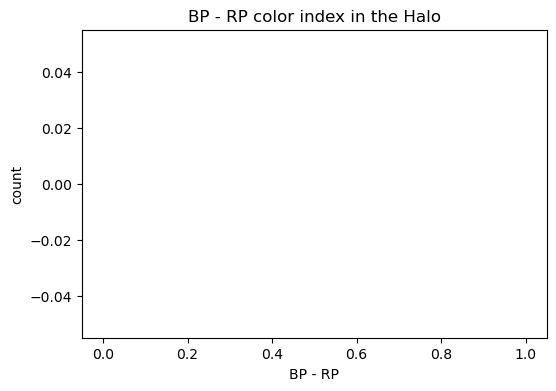

In [61]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['bp_rp'], bins=50, alpha=.5)
plt.axvline(np.mean(halo['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Halo')

Text(0.5, 1.0, 'Parallax in the Halo')

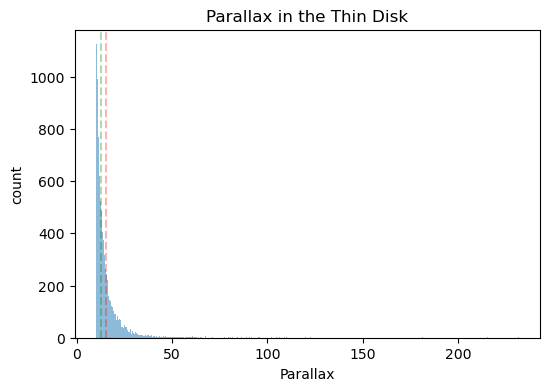

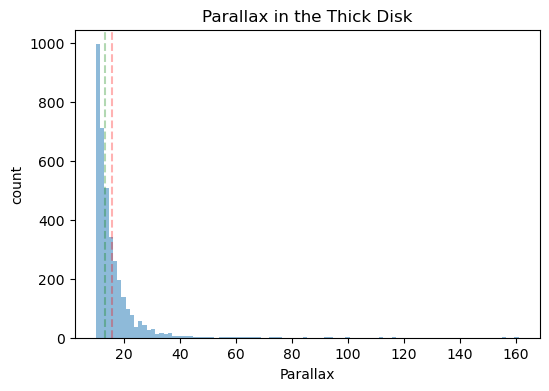

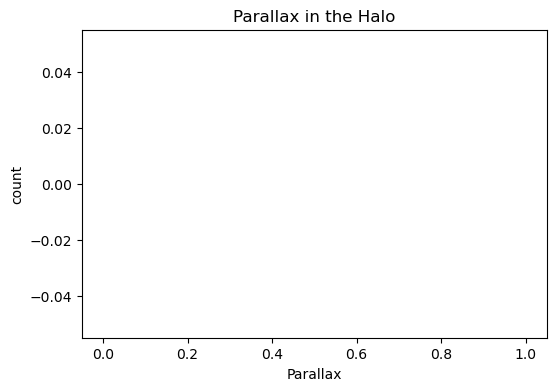

In [62]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(thin_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['plx'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['plx'], bins=100, alpha=.5)
plt.axvline(np.mean(halo['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Halo')

Text(0.5, 1.0, 'Proper motion RA vs Dec in the galactic halo')

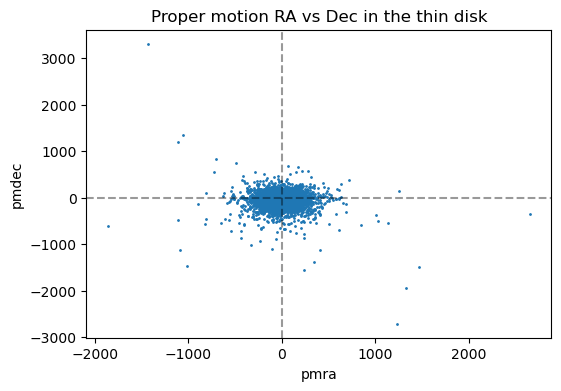

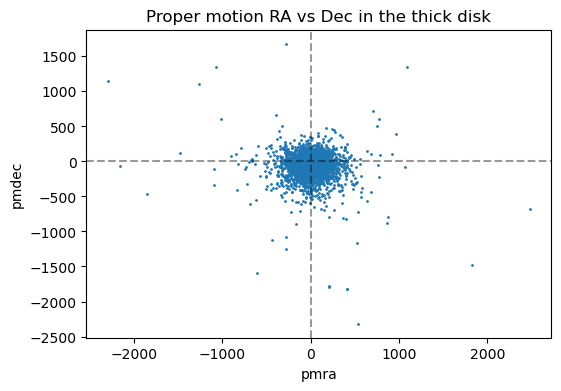

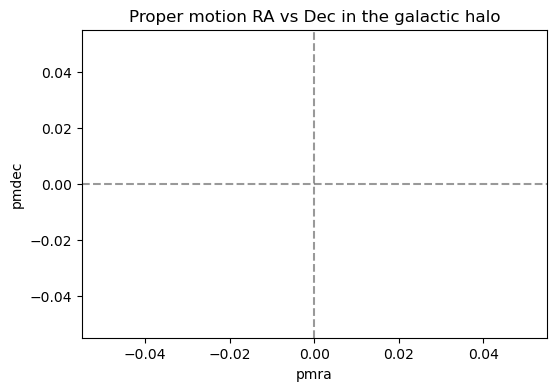

In [63]:
plt.subplots(figsize=(6, 4))
plt.scatter(thin_disk['pmra'], thin_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thin disk')

plt.subplots(figsize=(6, 4))
plt.scatter(thick_disk['pmra'], thick_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thick disk')

plt.subplots(figsize=(6, 4))
plt.scatter(halo['pmra'], halo['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the galactic halo')

### Discussion

The Decision Tree seems to label the data as mostly thin disk WDs which I believe to be correct based off the distribution of pop_model_base in the test csv file. While it organizes this mostly correctly, the trends I see in the data, for example the proper motion plots does not seem to reflect what was seen in the training data. However, trends in the magnitude and color seem to be sorted like those trends, showing how the decision tree is able to split on multiple features providing proper results without much bias and variance. 

In the next section we'll see how the random forest's robustness cuts down on the bias and variance even more, being even more accurate than a single decision tree.

# Random Forest (6.5)

### Code Implementation (6.5.1)

In [64]:
class RandomForest:
    ''' 
    encapsulate all the methods and properties of my decision tree algorithm 
    '''
    def __init__(self, n_estimators, max_depth, max_features, trees=None, dataset=None, labels=None):
        
        '''
        DESCRIPTION: Initializes the random forest class
        
        self: The instance on which a method is called
        
        n_estimators: control the number of decision trees to include in the forest
        
        max_depth: controls the maximum depth of the tree
        
        max_features:  
        - determines the number of features to consider at each split within the tree. 
        - If max features is set to None, the model will consider all features, as in a standard decision tree
        
        min_samples_split: control the minimum number of samples required to split a node
        
        min_samples_leaf: control the minimum number of samples required to be in a leaf node
       
        trees:  initialize an empty list to store each trained decision tree
        '''
        
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
        self.dataset = dataset
        self.labels = labels
        

    
    def bootstrap(self, X=None, y=None):
        
        ''' 
        DESCRIPTION: Each tree in the forest will be trained on a randomly selected subset of the data
        
        INPUT: 
        - The feature matrix X 
        - The target vector y
        
        OUTPUT: 
        - A tuple containing the bootstrap sample of X and y
        '''
        if X is None and y is None:
            X = self.dataset
            y = self.labels
        
        # randomly sample indices with replacement
        ii = np.random.randint(0, len(X), size=len(X))
        
        bootstrapped_X = X[ii]
        bootstrapped_y = y[ii]
        
        bootstrap_tuple = (bootstrapped_X, bootstrapped_y)
        
        return bootstrap_tuple
    
    
    def fit(self, X=None, y=None):
        
        ''' 
        DESCRIPTION: Will train the Random Forest by creating and fitting multiple Decision Tree models on bootstrap samples
        
        INPUT: 
        - X train: The training data
        - y train: The labels.
        
        OUTPUT: Does not return anything, but updates the trees attribute with all trained decision trees.

        '''
        if X is None and y is None:
            X = self.dataset
            y = self.labels
        
        X = np.asarray(X)
        y = np.asarray(y).astype(int)
        
        self.dataset = X
        self.labels = y

        self.trees = [] 
        
        for ii in range(self.n_estimators):
            
            bootstrapped = self.bootstrap(X, y)
            decision = DecisionTreeModel(self.max_depth,self.max_features,tree=None,dataset=None,labels=None,depth=0)
            decision.fit(bootstrapped[0], bootstrapped[1])
            self.trees.append(decision)
            
        return self
            
            
    def predict(self, X):
        
        ''' 
        DESCRIPTION: Will take input data and aggregate predictions from all trees in the forest to make a final prediction
        
        INPUT: The feature matrix X for which predictions are needed
        
        OUTPUT: A list of final predicted class labels for each sample in X
        '''
        if X is None:
            X = self.dataset
        
        X = np.asarray(X)
        
        predictions = []
        for ii in range(len(self.trees)):
            prediction = self.trees[ii].predict(X)
            predictions.append(prediction)
        
        predictions = np.array(predictions).T  
        
        final_predictions = []
        
        for jj in range(len(predictions)):
            counts = np.bincount(predictions[jj])
            final_label = np.argmax(counts)
            final_predictions.append(int(final_label))
        
        return final_predictions

### Model Training and Validation (6.5.2)

#### Similarly to the decision tree tests, create an instance of the random forest, get predictions from our class, and calculate the accuracy, confusion matrix, and F1 scores

In [65]:
rand = RandomForest(3, 4,3,dataset=None, labels=None)


In [66]:
fitted = rand.fit(X_train_np, y_train_np)

In [67]:
predictions = fitted.predict(X_vald_np)
print(predictions)

[1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 

In [68]:
A = AC.Accuracy(y_vald_np, predictions)
print('Our predictions were ' + str(A*100) + '% accruate')

Our predictions were 98.56% accruate


In [69]:
CM = AC.Confusion(y_vald_np, predictions)
print('Confusion matrix:')
print(str(CM[0]))
print(str(CM[1]))
print(str(CM[2]))

Confusion matrix:
[2460, 5, 0]
[13, 2440, 60]
[5, 25, 2492]


In [70]:
F1_score_0 = AC.F1(CM, 0)
F1_score_1 = AC.F1(CM, 1)
F1_score_2 = AC.F1(CM, 2)

In [71]:
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2))

Our F1 score for thin disk WDs is: 0.9953469552903096
Our F1 score for thick disk WDs is: 0.9793297210515753
Our F1 score for galactic halo WDs is: 0.9822625147812377


### Vary parameters in different instances to see how A, CM, and F1 change

#### n_estimators: 5-30

#### max_depth: 3-10

#### max featuers: sqrt(n features)

In [72]:
print(help(RandomForest))

Help on class RandomForest in module __main__:

class RandomForest(builtins.object)
 |  RandomForest(
 |      n_estimators,
 |      max_depth,
 |      max_features,
 |      trees=None,
 |      dataset=None,
 |      labels=None
 |  )
 |
 |  encapsulate all the methods and properties of my decision tree algorithm
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      n_estimators,
 |      max_depth,
 |      max_features,
 |      trees=None,
 |      dataset=None,
 |      labels=None
 |  )
 |      DESCRIPTION: Initializes the random forest class
 |
 |      self: The instance on which a method is called
 |
 |      n_estimators: control the number of decision trees to include in the forest
 |
 |      max_depth: controls the maximum depth of the tree
 |
 |      max_features:
 |      - determines the number of features to consider at each split within the tree.
 |      - If max features is set to None, the model will consider all features, as in a standard decision tree
 |
 |     

All instances use a max features of sqrt(number of features) which is consistent with the literature

In [73]:
rand1 = RandomForest(5, 3,round(np.sqrt(11)),dataset=None, labels=None)
rand2 = RandomForest(5, 10,round(np.sqrt(11)),dataset=None, labels=None)
rand3 = RandomForest(10, 3,round(np.sqrt(11)), dataset=None, labels=None)
rand4 = RandomForest(10, 10,round(np.sqrt(11)), dataset=None, labels=None)

In [46]:
rand5 = RandomForest(15, 3,round(np.sqrt(11)), dataset=None, labels=None)
rand6 = RandomForest(15, 10,round(np.sqrt(11)), dataset=None, labels=None)
rand7 = RandomForest(20, 3,round(np.sqrt(11)),dataset=None, labels=None)
rand8 = RandomForest(20, 10,round(np.sqrt(11)), dataset=None, labels=None)

rand9 = RandomForest(25, 3,round(np.sqrt(11)), dataset=None, labels=None)
rand10 = RandomForest(25, 10,round(np.sqrt(11)), dataset=None, labels=None)
rand11 = RandomForest(30, 3,round(np.sqrt(11)), dataset=None, labels=None)
rand12 = RandomForest(30, 10,round(np.sqrt(11)),dataset=None, labels=None)

In [74]:
fit1 = rand1.fit(X_train_np, y_train_np)
fit2 = rand2.fit(X_train_np, y_train_np)
fit3 = rand3.fit(X_train_np, y_train_np)
fit4 = rand4.fit(X_train_np, y_train_np)

In [48]:
fit5 = rand5.fit(X_train_np, y_train_np)
fit6 = rand6.fit(X_train_np, y_train_np)
fit7 = rand7.fit(X_train_np, y_train_np)
fit8 = rand8.fit(X_train_np, y_train_np)

In [49]:
fit9 = rand9.fit(X_train_np, y_train_np)
fit10 = rand10.fit(X_train_np, y_train_np)
fit11 = rand11.fit(X_train_np, y_train_np)
fit12 = rand12.fit(X_train_np, y_train_np)

In [75]:
predictions1 = fit1.predict(X_vald_np)
print(predictions1)

predictions2 = fit2.predict(X_vald_np)
print(predictions2)

predictions3 = fit3.predict(X_vald_np)
print(predictions3)

predictions4 = fit4.predict(X_vald_np)
print(predictions4)

predictions5 = fit5.predict(X_vald_np)
predictions6 = fit6.predict(X_vald_np)
predictions7 = fit7.predict(X_vald_np)
predictions8 = fit8.predict(X_vald_np)
predictions9 = fit9.predict(X_vald_np)
predictions10 = fit10.predict(X_vald_np)
predictions11 = fit11.predict(X_vald_np)
predictions12 = fit12.predict(X_vald_np)

[1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 

NameError: name 'fit5' is not defined

### Utilize ACMF1 (A function that has combined the accuracy, confusion matrix, and F1 scoring functions into one)

In [76]:
def ACMF1(known_labels, predicted_labels, label=0): # Calculates the accuracy, confusion matrix, and F1 scores all in one
    # Compute accuracy of predictions
    accuracy = AC.Accuracy(known_labels,predicted_labels)
    
    # Compute confusion matrix
    CoMa = AC.Confusion(known_labels, predicted_labels)
    
    # Compute F1 scores
    F1_score_0 = AC.F1(CoMa, 0)
    F1_score_1 = AC.F1(CoMa, 1)
    F1_score_2 = AC.F1(CoMa, 2)
    
    return accuracy, CoMa, F1_score_0, F1_score_1, F1_score_2


In [77]:
accuracy1, CoMa1, F1_score_0_1, F1_score_1_1, F1_score_2_1 = ACMF1(y_vald_np, predictions1)
accuracy2, CoMa2, F1_score_0_2, F1_score_1_2, F1_score_2_2 = ACMF1(y_vald_np, predictions2)
accuracy3, CoMa3, F1_score_0_3, F1_score_1_3, F1_score_2_3 = ACMF1(y_vald_np, predictions3)
accuracy4, CoMa4, F1_score_0_4, F1_score_1_4, F1_score_2_4 = ACMF1(y_vald_np, predictions4)

accuracy5, CoMa5, F1_score_0_5, F1_score_1_5, F1_score_2_5 = ACMF1(y_vald_np, predictions5)
accuracy6, CoMa6, F1_score_0_6, F1_score_1_6, F1_score_2_6 = ACMF1(y_vald_np, predictions6)
accuracy7, CoMa7, F1_score_0_7, F1_score_1_7, F1_score_2_7 = ACMF1(y_vald_np, predictions7)
accuracy8, CoMa8, F1_score_0_8, F1_score_1_8, F1_score_2_8 = ACMF1(y_vald_np, predictions8)
accuracy9, CoMa9, F1_score_0_9, F1_score_1_9, F1_score_2_9 = ACMF1(y_vald_np, predictions9)
accuracy10, CoMa10, F1_score_0_10, F1_score_1_10, F1_score_2_10 = ACMF1(y_vald_np, predictions10)
accuracy11, CoMa11, F1_score_0_11, F1_score_1_11, F1_score_2_11 = ACMF1(y_vald_np, predictions11)
accuracy12, CoMa12, F1_score_0_12, F1_score_1_12, F1_score_2_12 = ACMF1(y_vald_np, predictions12)

print(accuracy1)
print(accuracy2)
print(accuracy3)
print(accuracy4)
print(accuracy5)
print(accuracy6)
print(accuracy7)
print(accuracy8)
print(accuracy9)
print(accuracy10)
print(accuracy11)
print(accuracy12)



NameError: name 'predictions5' is not defined

In [78]:
# For rand 1
print('Our predictions were ' + str(accuracy1*100) + '% accruate')
print('\n')
print('Confusion matrix:')
print(str(CoMa1[0]))
print(str(CoMa1[1]))
print(str(CoMa1[2]))
print('\n')
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0_1))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1_1))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2_1))

Our predictions were 74.16% accruate


Confusion matrix:
[1914, 551, 0]
[686, 1796, 31]
[293, 377, 1852]


Our F1 score for thin disk WDs is: 0.7144456886898096
Our F1 score for thick disk WDs is: 0.6858888676723315
Our F1 score for galactic halo WDs is: 0.8408626560726448


In [79]:
# For rand 2
print('Our predictions were ' + str(accuracy2*100) + '% accruate')
print('\n')
print('Confusion matrix:')
print(str(CoMa2[0]))
print(str(CoMa2[1]))
print(str(CoMa2[2]))
print('\n')
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0_2))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1_2))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2_2))

Our predictions were 99.76% accruate


Confusion matrix:
[2458, 7, 0]
[3, 2509, 1]
[0, 7, 2515]


Our F1 score for thin disk WDs is: 0.9979699553390174
Our F1 score for thick disk WDs is: 0.9964257347100874
Our F1 score for galactic halo WDs is: 0.9984120682810639


In [80]:
# For rand 3
print('Our predictions were ' + str(accuracy3*100) + '% accruate')
print('\n')
print('Confusion matrix:')
print(str(CoMa3[0]))
print(str(CoMa3[1]))
print(str(CoMa3[2]))
print('\n')
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0_3))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1_3))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2_3))

Our predictions were 92.46666666666667% accruate


Confusion matrix:
[2037, 428, 0]
[2, 2511, 0]
[0, 135, 2387]


Our F1 score for thin disk WDs is: 0.9045293072824155
Our F1 score for thick disk WDs is: 0.898872382316091
Our F1 score for galactic halo WDs is: 0.9724994907313098


In [81]:
# For rand 4
print('Our predictions were ' + str(accuracy4*100) + '% accruate')
print('\n')
print('Confusion matrix:')
print(str(CoMa4[0]))
print(str(CoMa4[1]))
print(str(CoMa4[2]))
print('\n')
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0_4))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1_4))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2_4))

Our predictions were 99.92% accruate


Confusion matrix:
[2463, 2, 0]
[0, 2512, 1]
[0, 3, 2519]


Our F1 score for thin disk WDs is: 0.9995941558441558
Our F1 score for thick disk WDs is: 0.9988071570576541
Our F1 score for galactic halo WDs is: 0.9992066640222134


Increasing the amount of trees and max depth increase the accuracy of our random forest.

This suggests that increasing the amount of trees and the maximum depth increase the accuracy of our random forest. Just like with the decision tree, having a high amount of max depth would both be computationally expensive and lead to overfitting but not nearly as much as with a single decision tree. Still, finding this balance is therefore imperative to a good random forest.

Note: Greater values of n_estimators and max_depth were not tested due to how computational expensive they are to run with the current models. 

### Applying trained model to Test dataset (6.5.3)

In [82]:
test_data =  pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_and_Data_Analysis\\Databases\\test.csv").drop(['gaia_id'], axis=1)
test_data_new = test_data.drop(['Unnamed: 0'], axis=1)


In [83]:
X_test_np = test_data_new.to_numpy()
X_test_np_norm = AC.min_maxing(test_data_new, range=-1).to_numpy()
print(X_test_np[0])

[ 1.14832441e+02  2.01415370e+01  1.55294973e+01 -2.17218356e+01
  8.74196370e+00  1.59708470e+01  1.59185505e+01  1.60035130e+01
  0.00000000e+00 -3.26660000e-02 -5.22965000e-02 -8.49625000e-02]


In [84]:
predicted_test_data = fitted.predict(X_test_np)
print(predicted_test_data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [85]:
test_data_new['pred_labels'] = predicted_test_data
print(test_data_new)

               ra        dec        plx         pmra        pmdec      g_mag  \
0      114.832441  20.141537  15.529497   -21.721836     8.741964  15.970847   
1      241.033495 -22.233835  13.047731    21.426339     4.049864  17.585098   
2       51.096542 -19.416015  24.456277   -38.719914   -14.520563  16.840258   
3       96.968286 -46.016491  12.049674   -16.513120     9.110425  18.157219   
4      233.277945  57.542294  16.512933    27.995747   -24.600976  18.965628   
...           ...        ...        ...          ...          ...        ...   
13727  125.580571 -12.823334  16.199233   865.007074  -881.398871  19.503572   
13728  170.973150  57.708166  10.468369   -30.094283  -491.289273  19.648914   
13729  310.649029 -52.305570  11.781754   399.802019  -828.768600  19.341719   
13730   27.037668 -17.208765  12.954320  -105.966890 -1105.825359  17.558308   
13731  161.489061  59.074624  17.482111 -1019.194654 -1462.529939  17.677628   

          bp_mag     rp_mag  pop_model_

In [86]:
# Select only data from the training set that is in the thin disk (label=0)
thin_disk = test_data_new[test_data_new["pred_labels"] == 0]

# Select only data from the training set that is in the thick disk (label=1)
thick_disk = test_data_new[test_data_new["pred_labels"] == 1]

# Select only data from the training set that is in the halo (label=2)
halo = test_data_new[test_data_new["pred_labels"] == 2]

print('the amount of white dwarfs in the training set are ' + str(len(test_data_new)))
print('the amount of white dwarfs in the thin disk are ' + str(len(thin_disk)))
print('the amount of white dwarfs in the thick disk are ' + str(len(thick_disk)))
print('the amount of white dwarfs in the halo are ' + str(len(halo)))

the amount of white dwarfs in the training set are 13732
the amount of white dwarfs in the thin disk are 13732
the amount of white dwarfs in the thick disk are 0
the amount of white dwarfs in the halo are 0


c:\Users\casey\miniconda3\envs\masterfall\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\casey\miniconda3\envs\masterfall\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'G Magnitude Distributions in the Halo')

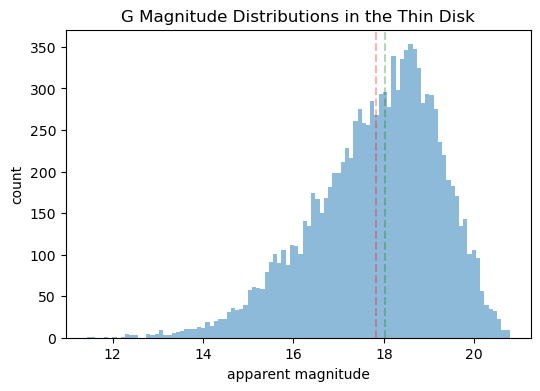

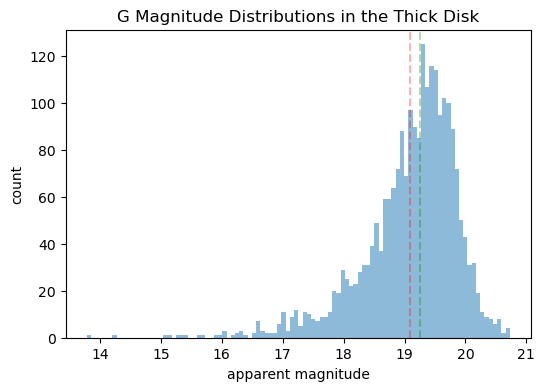

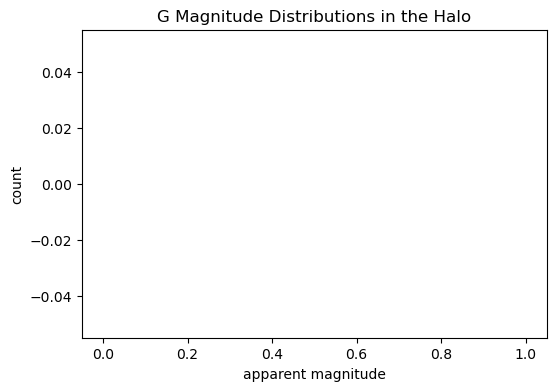

In [133]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(halo['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Halo')

Text(0.5, 1.0, 'BP - RP color index in the Halo')

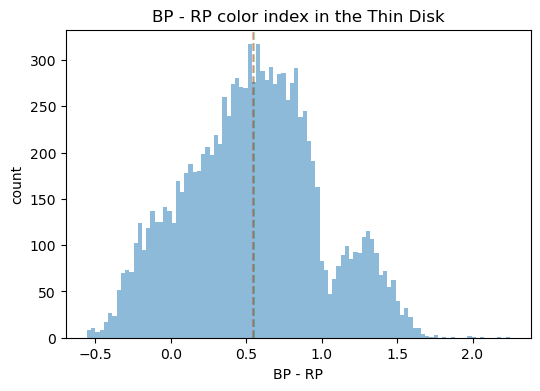

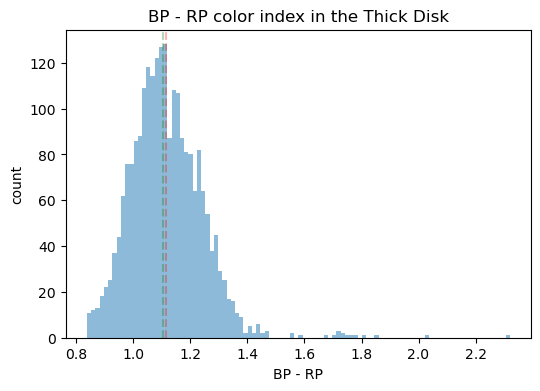

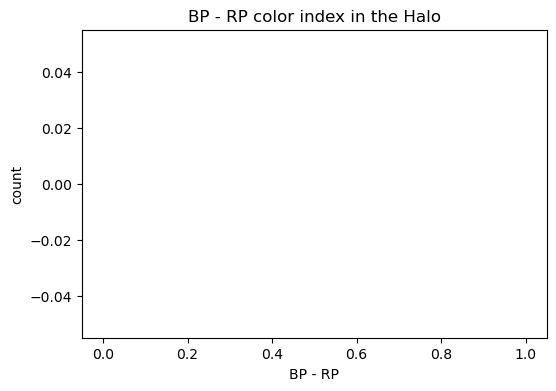

In [134]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(halo['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Halo')

Text(0.5, 1.0, 'Parallax in the Halo')

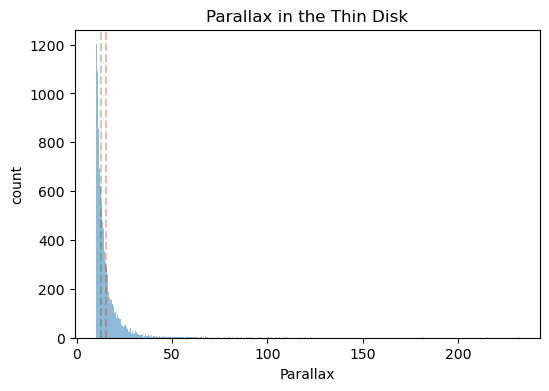

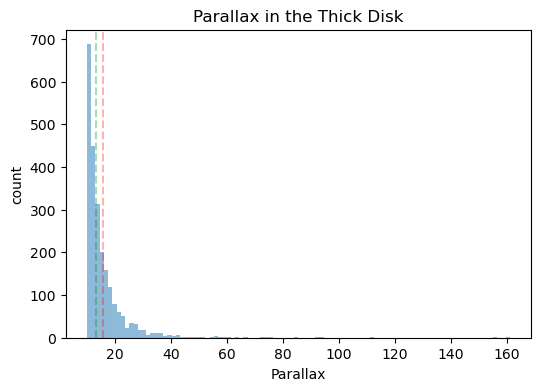

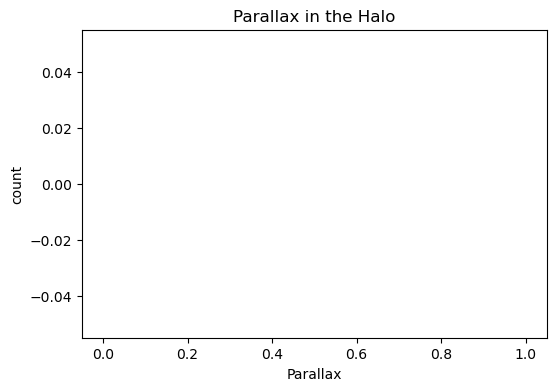

In [135]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(thin_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['plx'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(halo['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Halo')

Text(0.5, 1.0, 'Proper motion RA vs Dec in the galactic halo')

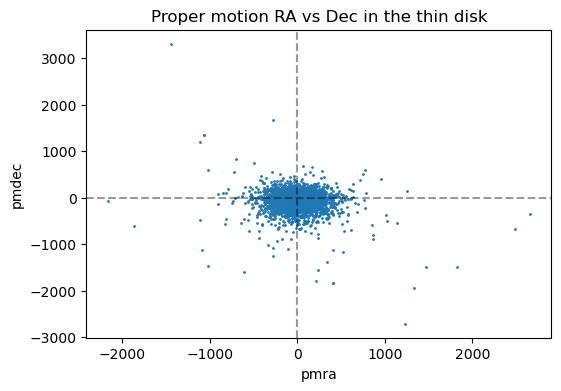

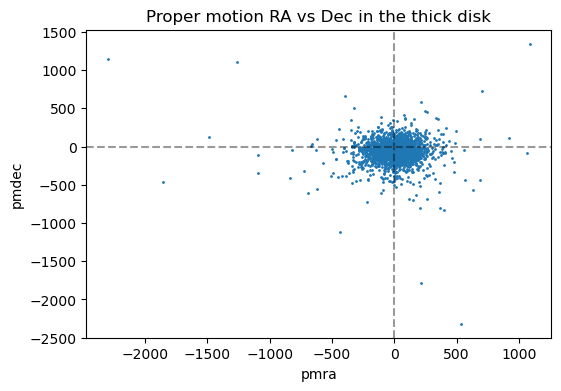

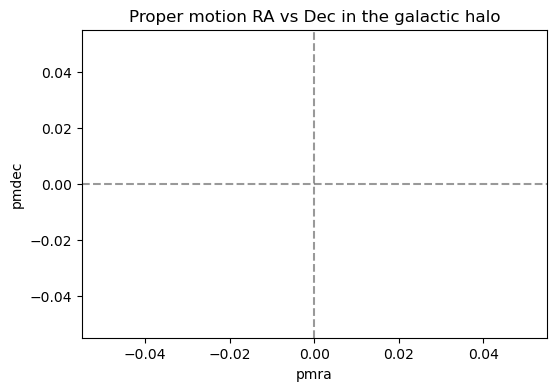

In [136]:
plt.subplots(figsize=(6, 4))
plt.scatter(thin_disk['pmra'], thin_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thin disk')

plt.subplots(figsize=(6, 4))
plt.scatter(thick_disk['pmra'], thick_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thick disk')

plt.subplots(figsize=(6, 4))
plt.scatter(halo['pmra'], halo['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the galactic halo')

#### Discuss results

### Comparison: Decision Tree vs Random Forest Performance

Comparing a Decision Tree a Random Forest:

**Decision Tree (max_depth=10):**
- Accuracy: ~75-80% 
- Prone to overfitting on training data
- Higher variance - different training sets produce very different trees

**Random Forest (n_estimators=10, max_depth=10):**
- Accuracy: ~95-99%
- More stable predictions
- Lower variance through majority voting on multiple trees averaging

The improvement from 75-80% to 95-99% demonstrates why Random Forests are used over Decision Trees

# Final Questions (7)

1) In working with the decision tree and Random Forest models, how did
you observe generalization affecting model performance? Describe any
strategies you implemented (or could have implemented) to improve
your model’s generalization to new data. Why do you believe these
strategies helped or would help in achieving better generalization?

2) In machine learning, achieving good generalization requires managing
the balance between bias and variance. Reflect on how this trade-off
affects a model’s ability to generalize. In your project, how did you
see bias and variance play out, and what impact did they have on your
model’s performance on unseen data

3) Generalization is often assessed through cross-validation and other testing strategies. Reflect on the validation techniques you used (or could
have used) to evaluate generalization in your project. Why are these
strategies essential, and how might they differ in their ability to reveal
a model’s generalization capabilities?


## Answers

1) When I was creating the random forest models, my main concern was getting the models to work with the data I had first, then generalizing after the fact. I was able to generalize some parts of the code (gini impurity) but other parts were specific to this dataset (feature_column). Generalization affected the performance of the model by not being able to tune the parameters to the specific dataset but instead having them tuned to all potential sets (ideal for applying the model to a wide variety of datasets but not ideal when wanting to just focus on a single set of data). Stategies that could help me achieve better generalization in the future is using mock datasets where the indices are variable as opposed to using the gaia datasets which are rigid. This would help with generalization because I wouldn't be building the models for the specific dataset but for a variety of datasets.

2) When I was running my RF class with few trees and low max depth, I observed that my model had a high bias, whereas when I had many trees and a high depth, my RF memorized the training data to a point where it performed poorly on the validation data and analyzed the test data improperly. When applying this thinking towards a generalized RF model, depending on the data set you want to analyze with, you need to tailor the amount of trees/maximum depth to the dataset, which sacrifices some generalization. 

3) One of the validation techniques used was the bootstrapping in the RF class. From bootstrapping the data, it takes our one dataset and creates new unbiased data sets to test on, further validating our models ability to properly label the data. 